# 브랜드 커피 상권 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
plt.rc("font", family='NanumGothic')
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 데이터 불러오기

In [4]:
dir_path="data/"
file_list=os.listdir(dir_path)
file_list

['seoul_municipalities_geo_simple.json',
 '소상공인시장진흥공단_상가(상권)정보_강원_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경기_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_광주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대구_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대전_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_부산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_서울_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_세종_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_울산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_인천_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_제주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충북_202012.csv']

In [5]:
# 도시 목록
city_list=[x.split('_')[2] for x in file_list if '.csv' in x]

In [6]:
while True:
    print("도시 목록 : ",end = '')
    for i in city_list:
        if i is not city_list[-1]: print(i, end=',')
        else : print(i)
    city=input('분석하고 싶은 도시 이름을 입력해주세요 : ')
    if city in city_list : break
    print('도시 목록에 있는 것만 입력해주세요!')
    print('---------------------------------------------------\n')

도시 목록 : 강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
분석하고 싶은 도시 이름을 입력해주세요 : 서울


In [7]:
df=pd.DataFrame()
for i in file_list:
    if city in i : df=pd.read_csv(dir_path+i,sep="|")
pd.options.display.max_columns = len(df.columns) # 모든 컬럼이 표시되도록 max_columns의 수를 지정
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11740,강동구,1174056000,고덕2동,1174010200,고덕동,1174010200206930000,1,대지,693,NaN,서울특별시 강동구 고덕동 693,117403124001,서울특별시 강동구 고덕로,333,NaN,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144071000,연남동,1144012400,연남동,1144012400203900067,1,대지,390,67.0,서울특별시 마포구 연남동 390-67,114404139119,서울특별시 마포구 동교로38안길,7,NaN,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144066000,서교동,1144012000,서교동,1144012000203950112,1,대지,395,112.0,서울특별시 마포구 서교동 395-112,114404139571,서울특별시 마포구 잔다리로3안길,23,NaN,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11620,관악구,1162066500,서림동,1162010200,신림동,1162010200201180033,1,대지,118,33.0,서울특별시 관악구 신림동 118-33,116204160502,서울특별시 관악구 신림로14길,3,NaN,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,11,서울특별시,11710,송파구,1171053200,거여2동,1171011300,거여동,1171011300200360000,1,대지,36,NaN,서울특별시 송파구 거여동 36,117103123014,서울특별시 송파구 오금로,527,NaN,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346572,17222727,현대기림,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11200,성동구,1120065000,성수1가1동,1120011400,성수동1가,1120011400202760017,1,대지,276,17.0,서울특별시 성동구 성수동1가 276-17,112003103010,서울특별시 성동구 뚝섬로,366,72.0,1120011400102760017009013,NaN,서울특별시 성동구 뚝섬로 366-72,133819,4775.0,NaN,NaN,NaN,127.051154,37.539464
346573,17222723,본현대미아점,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11290,성북구,1129068500,길음2동,1129013400,길음동,1129013400200200001,1,대지,20,1.0,서울특별시 성북구 길음동 20-1,112903107003,서울특별시 성북구 동소문로,315,NaN,1129013400100200001025204,현대백화점미아점,서울특별시 성북구 동소문로 315,136719,2730.0,NaN,5,NaN,127.028726,37.608392
346574,17219564,오피스알파,약장수,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11305,강북구,1130563500,수유3동,1130510300,수유동,1130510300200360037,1,대지,36,37.0,서울특별시 강북구 수유동 36-37,113054124005,서울특별시 강북구 노해로17길,62,1.0,1130510300100360037035171,NaN,서울특별시 강북구 노해로17길 62-1,142872,1075.0,NaN,NaN,101,127.018733,37.640485
346575,17219761,앤클라인뉴욕핸드백,NaN,D,소매,D06,가방/신발/액세서리,D06A10,가방/가죽제품소매,G47430,가방 및 기타 가죽제품 소매업,11,서울특별시,11530,구로구,1153056000,구로5동,1153010200,구로동,1153010200205730000,1,대지,573,NaN,서울특별시 구로구 구로동 573,115303116005,서울특별시 구로구 구로중앙로,152,NaN,1153010200105730000020642,NC백화점,서울특별시 구로구 구로중앙로 152,152715,8292.0,NaN,1,NaN,126.882409,37.501378


## 인덱스 정보 보기

In [8]:
df.index

RangeIndex(start=0, stop=346577, step=1)

## 컬럼명 보기

In [9]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 결측치 확인하기

In [10]:
import missingno as msno
True==1

True

### 데이터 프레임 결측치 시각화

<AxesSubplot:>

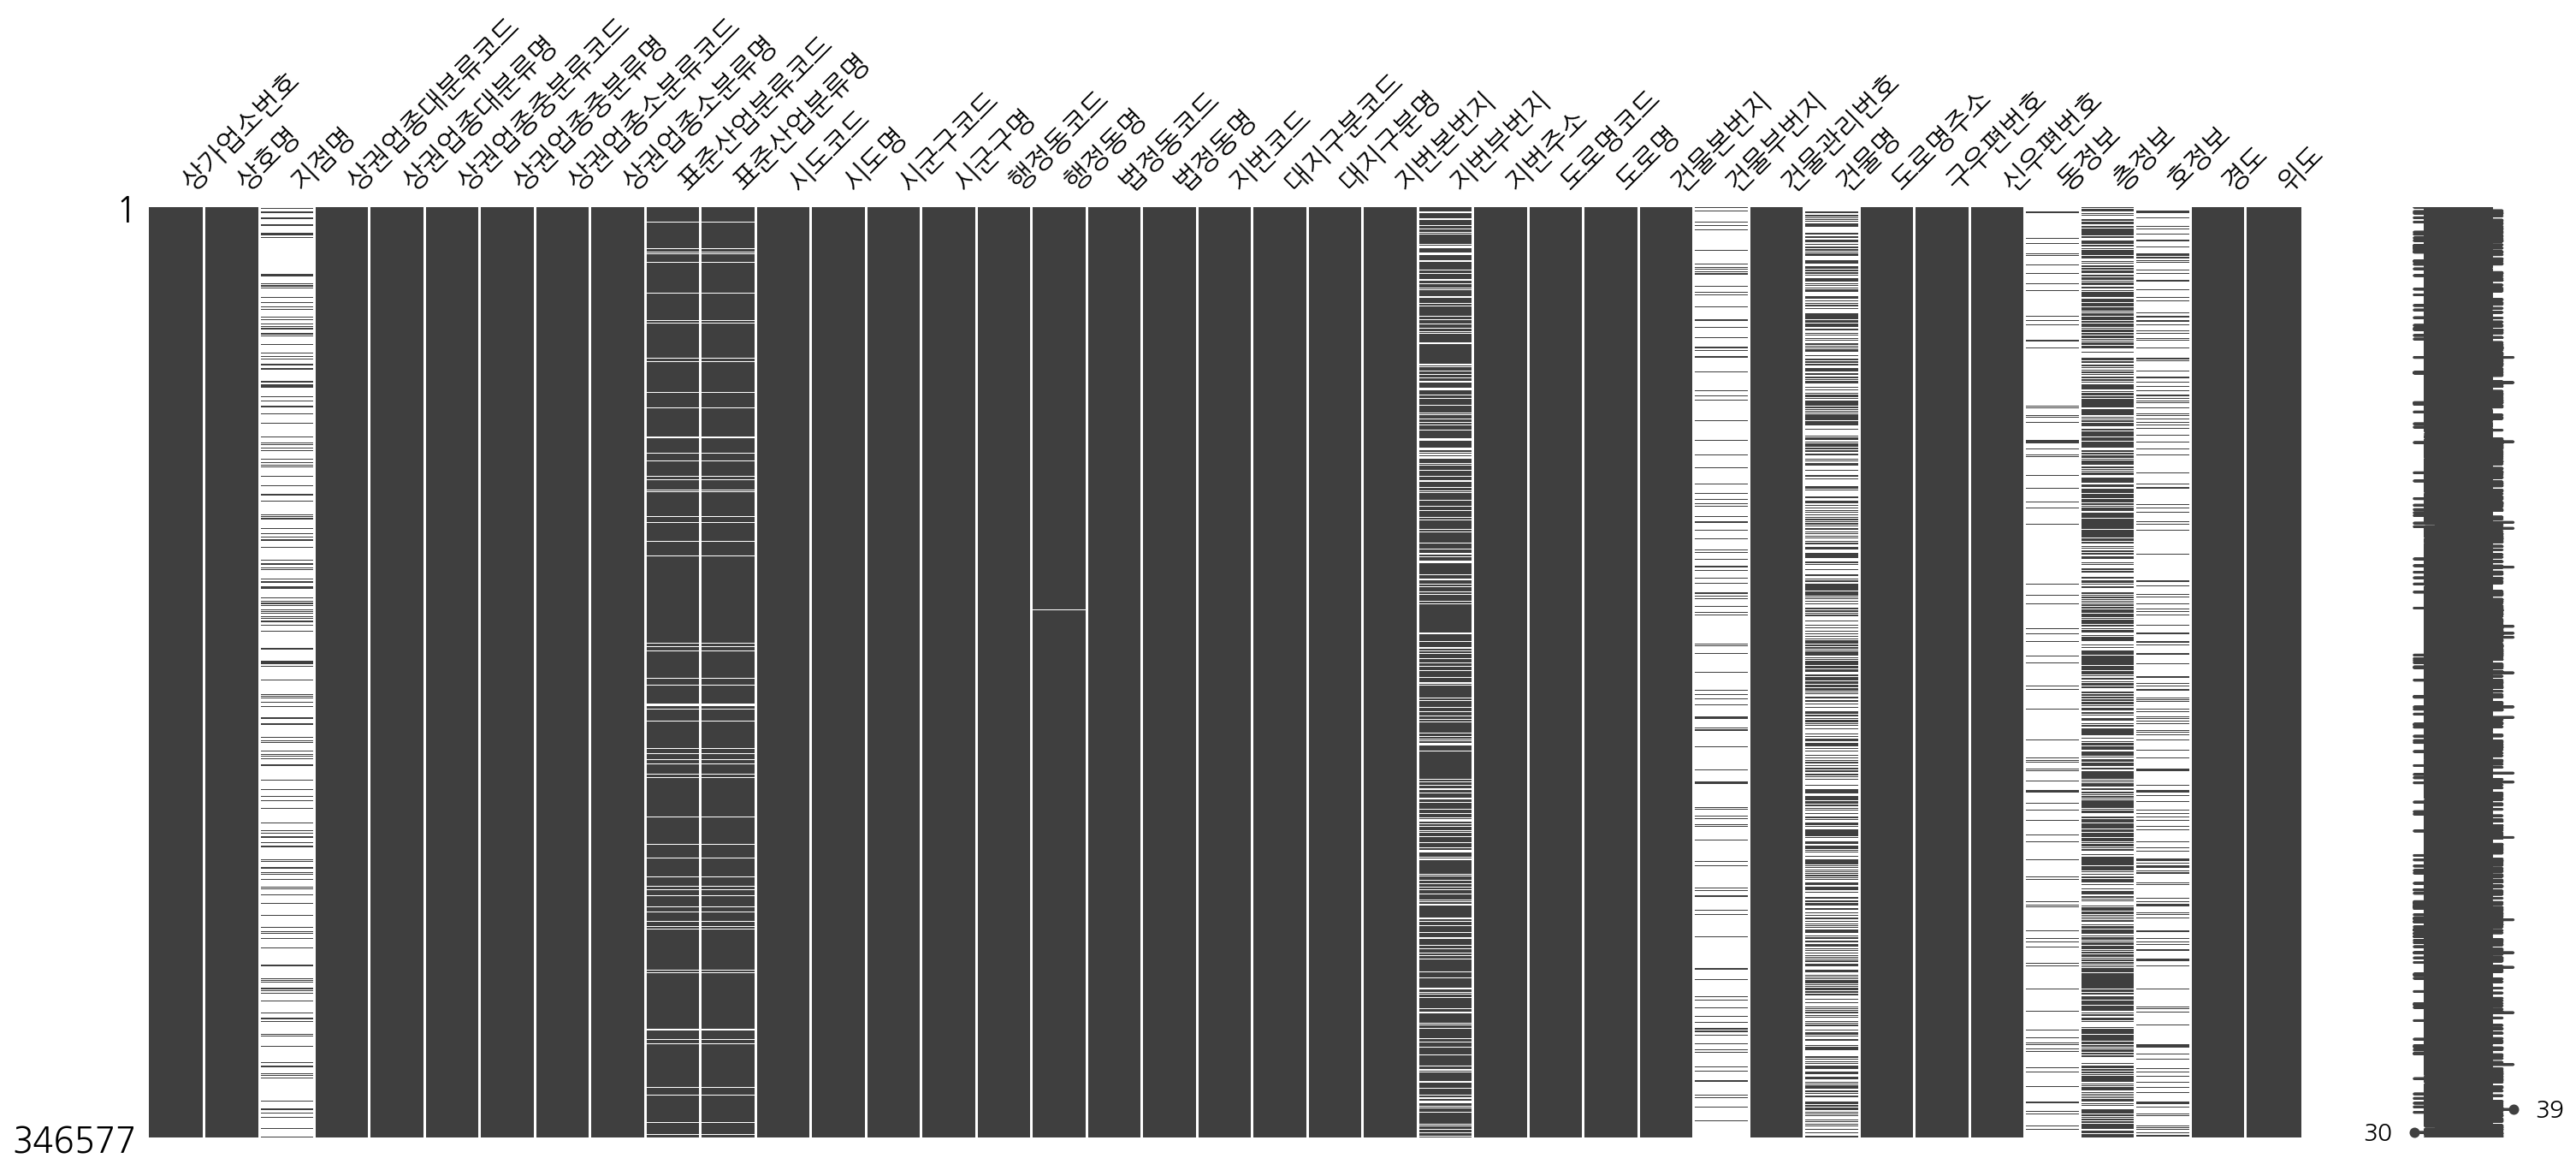

In [11]:
msno.matrix(df)

+ 하얀 부분이 결측치

<AxesSubplot:>

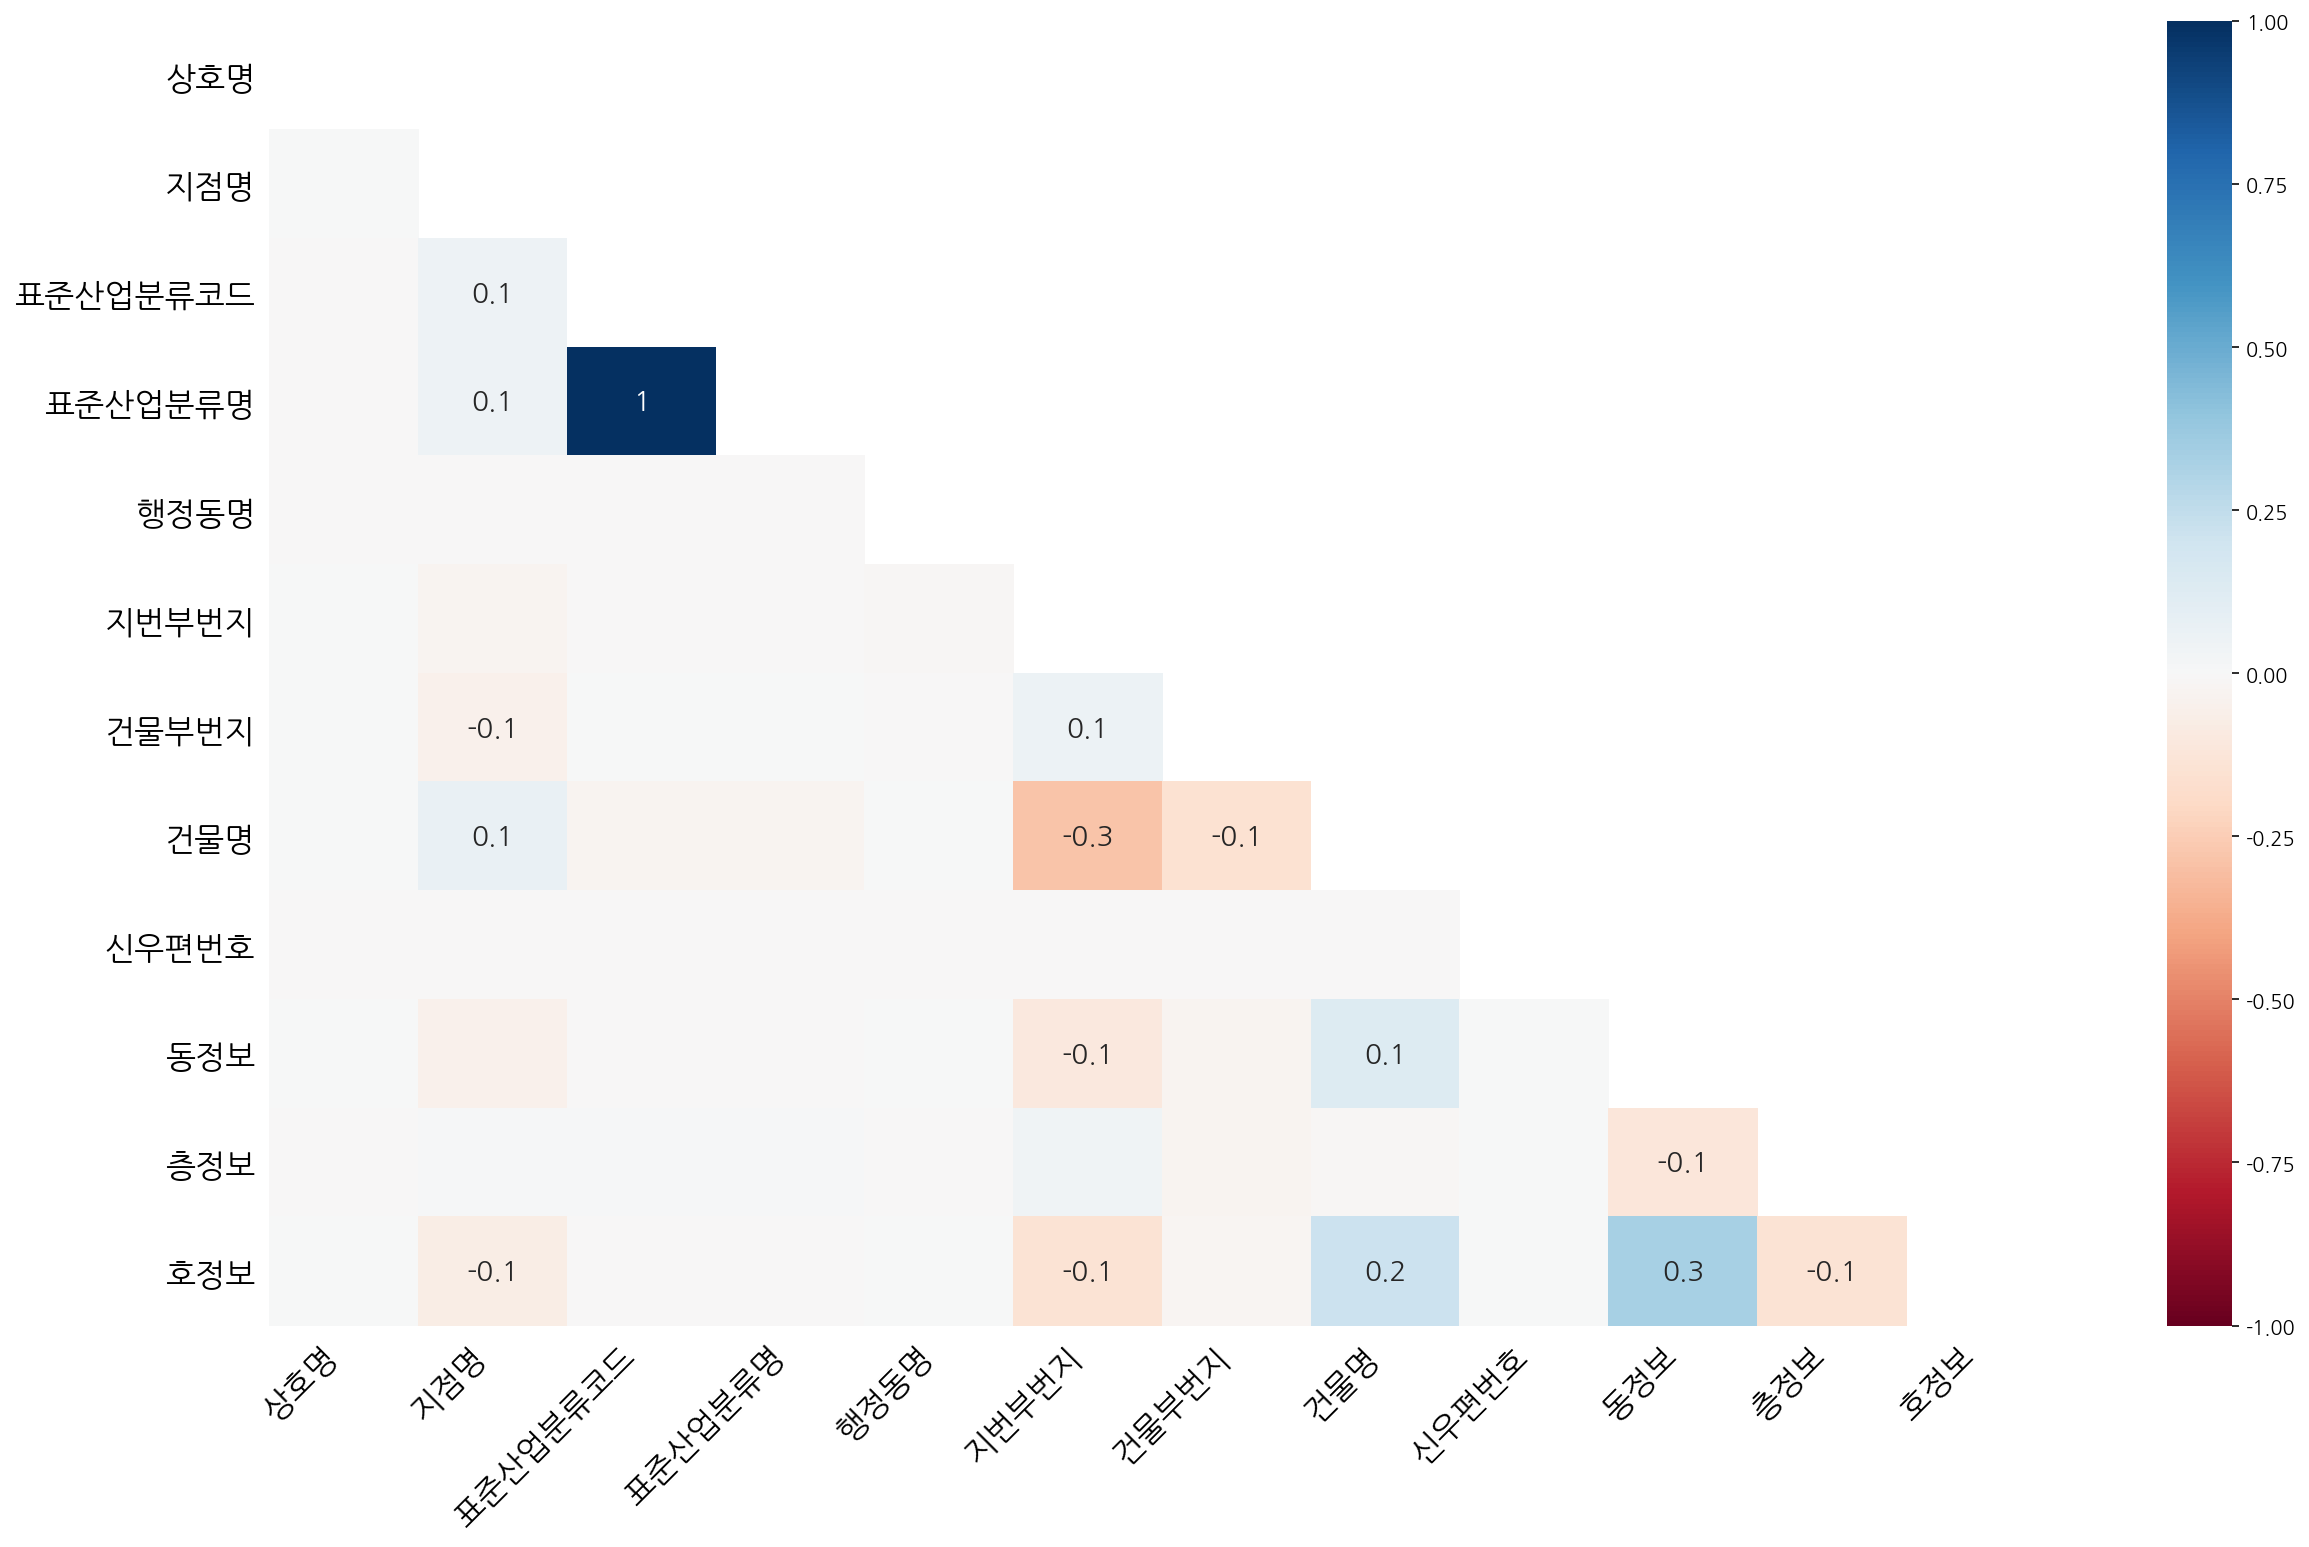

In [12]:
msno.heatmap(df)

<AxesSubplot:title={'center':'<열의 결측치>'}>

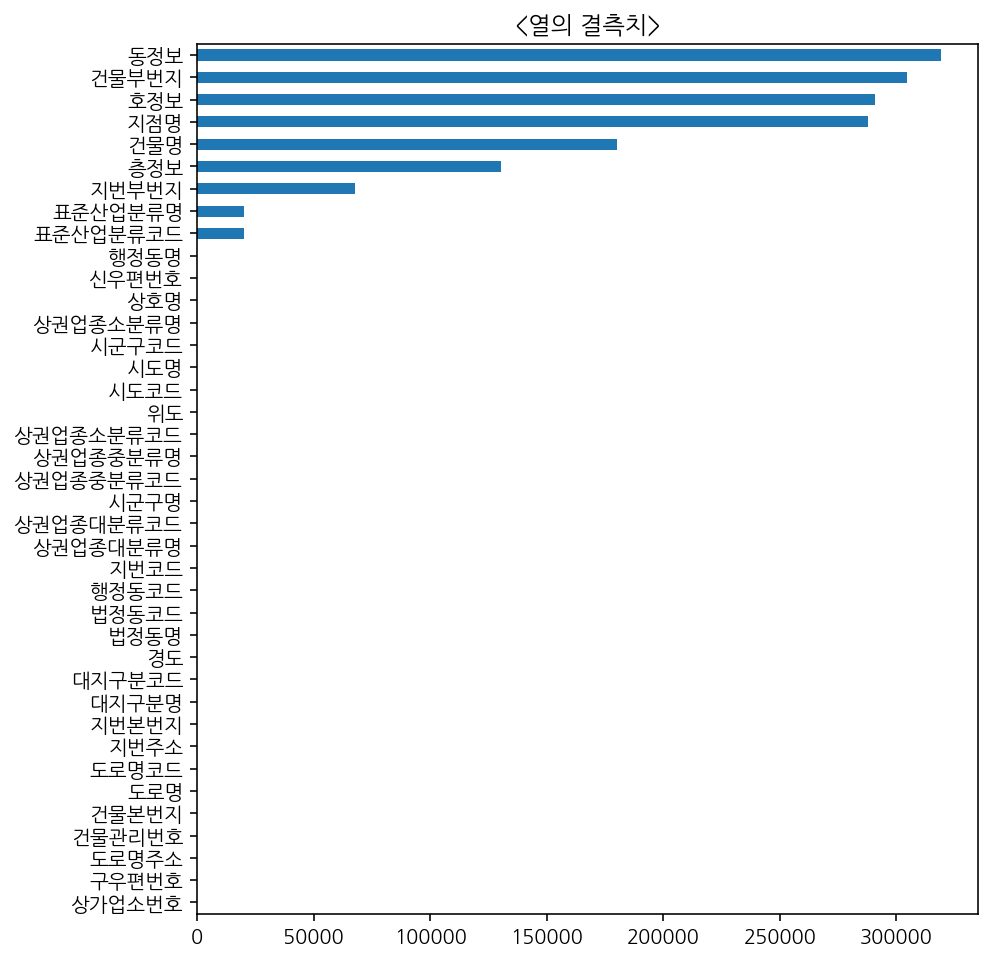

In [13]:
n=df.isnull().sum()
plt.title('<열의 결측치>')
n.sort_values().plot.barh(figsize=(7, 8))

### 결측치가 많은 컬럼이나 사용하지 않는 컬럼 제거

#### 결측치가 너무 많은 컬럼 제거

In [14]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수로 저장
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 변수로 저장
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '호정보', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [15]:
# 사용하지 않는 컬럼을 제거
df = df.drop(not_use_col, axis=1)

#### 사용하지 않는 컬럼 제거

In [16]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 저장
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [17]:
# 컬럼명에 "코드", "번호"가 있지만 분석에 필요하지 않기 때문에 
# '코드'와 '번호'를 포함하고 있는 컬럼 찾아와서 cols_code 라는 변수에 저장
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [18]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거
df = df.drop(cols_code, axis=1)

In [19]:
city="".join(list(df['시도명'].unique()))

In [20]:
# "상호명"의 문자열을 소문자로 변경한 "상호명_소문자" 컬럼 생성
df["상호명_소문자"] = df["상호명"].str.lower()

In [21]:
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도,상호명_소문자
0,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,서울특별시 강동구 고덕로 333,127.159471,37.556197,도전최강달인왕만두
1,이때,음식,한식,한식/백반/한정식,서울특별시,마포구,연남동,연남동,대지,390,서울특별시 마포구 연남동 390-67,서울특별시 마포구 동교로38안길,7,서울특별시 마포구 동교로38안길 7,126.924660,37.562176,이때
2,L.A.D,음식,한식,한식/백반/한정식,서울특별시,마포구,서교동,서교동,대지,395,서울특별시 마포구 서교동 395-112,서울특별시 마포구 잔다리로3안길,23,서울특별시 마포구 잔다리로3안길 23,126.919845,37.550689,l.a.d
3,제이씨에스푸드,음식,한식,한식/백반/한정식,서울특별시,관악구,서림동,신림동,대지,118,서울특별시 관악구 신림동 118-33,서울특별시 관악구 신림로14길,3,서울특별시 관악구 신림로14길 3,126.937790,37.471190,제이씨에스푸드
4,BYC상신점,소매,의복의류,셔츠/내의/속옷,서울특별시,송파구,거여2동,거여동,대지,36,서울특별시 송파구 거여동 36,서울특별시 송파구 오금로,527,서울특별시 송파구 오금로 527,127.147321,37.493054,byc상신점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346572,현대기림,소매,건강/미용식품,건강식품판매,서울특별시,성동구,성수1가1동,성수동1가,대지,276,서울특별시 성동구 성수동1가 276-17,서울특별시 성동구 뚝섬로,366,서울특별시 성동구 뚝섬로 366-72,127.051154,37.539464,현대기림
346573,본현대미아점,소매,건강/미용식품,건강식품판매,서울특별시,성북구,길음2동,길음동,대지,20,서울특별시 성북구 길음동 20-1,서울특별시 성북구 동소문로,315,서울특별시 성북구 동소문로 315,127.028726,37.608392,본현대미아점
346574,오피스알파,소매,건강/미용식품,건강식품판매,서울특별시,강북구,수유3동,수유동,대지,36,서울특별시 강북구 수유동 36-37,서울특별시 강북구 노해로17길,62,서울특별시 강북구 노해로17길 62-1,127.018733,37.640485,오피스알파
346575,앤클라인뉴욕핸드백,소매,가방/신발/액세서리,가방/가죽제품소매,서울특별시,구로구,구로5동,구로동,대지,573,서울특별시 구로구 구로동 573,서울특별시 구로구 구로중앙로,152,서울특별시 구로구 구로중앙로 152,126.882409,37.501378,앤클라인뉴욕핸드백


## 분석할 카페 데이터 준비

In [22]:
cafe_name=['스타벅스','투썸플레이스','엔제리너스','메가커피','이디야']
cafe_list=[['스타벅스','스타벅스|starbucks','green','Greens'],
           ['투썸플레이스','투썸|twosme+|twosome|twosom','red','Reds'],
           ['엔제리너스','엔젤리너스|엔젤리러스|엔제리너스','saddlebrown','YlOrBr'],
           ['메가커피','메가커피|mega|메가엠지씨','orange','Oranges'],
           ['이디야','이디야|이디아|ediya','blue','Blues']]

In [23]:
while True:
    print("카페 브랜드 : "+",".join(cafe_name))
    print('분석하고 싶은 카페 브랜드명 두가지를 입력하세요!')
    cafe_1=input('첫번째 카페 : ')
    cafe_2=input('두번째 카페 : ')
    if (cafe_1 not in cafe_name) or (cafe_2 not in cafe_name) :
        print('분석할 카페 이름이 잘 못 입력되었습니다!')
    elif cafe_1 == cafe_2 : 
        print('분석할 카페가 동일합니다. 서로 다른 카페를 선택해주세요!')
    else:
        cafe_1=cafe_list[cafe_name.index(cafe_1)]
        cafe_2=cafe_list[cafe_name.index(cafe_2)]
        break
    print('---------------------------------------------------\n')

카페 브랜드 : 스타벅스,투썸플레이스,엔제리너스,메가커피,이디야
분석하고 싶은 카페 브랜드명 두가지를 입력하세요!
첫번째 카페 : 투썸플레이스
두번째 카페 : 이디야


In [24]:
# 분석할 카페 데이터들 df_cafe에 저장
df_cafe = df[(df["상권업종중분류명"]=='커피점/카페') & (df["상호명_소문자"].str.contains('{}|{}'.format(cafe_1[1],cafe_2[1]),na=False))]

In [25]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains(cafe_1[1]), "브랜드명"] = cafe_1[0]
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains(cafe_1[1]), "브랜드명"] = cafe_2[0]
df_cafe = df_cafe.drop(['상호명','상호명_소문자','상권업종대분류명', '상권업종중분류명', '상권업종소분류명'], axis=1)
df_cafe

,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도,브랜드명
1752,서울특별시,영등포구,신길1동,신길동,대지,59,서울특별시 영등포구 신길동 59-2,서울특별시 영등포구 영등포로,353,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야
1797,서울특별시,중구,소공동,태평로2가,대지,52,서울특별시 중구 태평로2가 52-4,서울특별시 중구 남대문로1길,57,서울특별시 중구 남대문로1길 57-1,126.977556,37.563637,이디야
2223,서울특별시,영등포구,여의동,여의도동,대지,61,서울특별시 영등포구 여의도동 61-3,서울특별시 영등포구 63로,40,서울특별시 영등포구 63로 40,126.939198,37.519544,이디야
3417,서울특별시,금천구,시흥2동,시흥동,대지,1011,서울특별시 금천구 시흥동 1011,서울특별시 금천구 금하로,750,서울특별시 금천구 금하로 750,126.913646,37.449066,이디야
3525,서울특별시,용산구,용산2가동,용산동2가,대지,1,서울특별시 용산구 용산동2가 1-3,서울특별시 용산구 남산공원길,105,서울특별시 용산구 남산공원길 105,126.987856,37.551111,투썸플레이스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341583,서울특별시,동대문구,전농2동,전농동,대지,39,서울특별시 동대문구 전농동 39-18,서울특별시 동대문구 사가정로,132,서울특별시 동대문구 사가정로 132,127.059501,37.577591,이디야
344521,서울특별시,강남구,삼성1동,삼성동,대지,154,서울특별시 강남구 삼성동 154-8,서울특별시 강남구 테헤란로87길,35,서울특별시 강남구 테헤란로87길 35,127.057703,37.509953,투썸플레이스
344561,서울특별시,금천구,가산동,가산동,대지,219,서울특별시 금천구 가산동 219-6,서울특별시 금천구 벚꽃로24길,26,서울특별시 금천구 벚꽃로24길 26,126.888796,37.474083,투썸플레이스
345646,서울특별시,양천구,목1동,목동,대지,961,서울특별시 양천구 목동 961,서울특별시 양천구 오목로,300,서울특별시 양천구 오목로 300,126.870010,37.524822,투썸플레이스


# 분석

## 브랜드명으로 각 카페의 수

In [26]:
df_cafe["브랜드명"].value_counts()

이디야       513
투썸플레이스    292
Name: 브랜드명, dtype: int64

## 브랜드명으로 막대그래프

Text(0.5, 1.0, '<서울특별시의 투썸플레이스와 이디야의 점포수>')

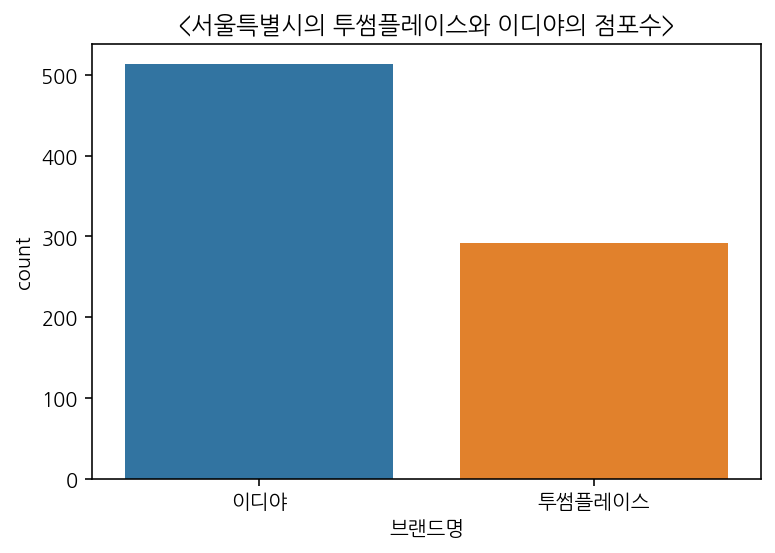

In [27]:
sns.countplot(data=df_cafe, x="브랜드명")
plt.title('<{}의 {}와 {}의 점포수>'.format(city,cafe_1[0],cafe_2[0]))

## 시군구별 점포수

Text(0.5, 1.0, '<서울특별시의 구별 투썸플레이스와 이디야의 점포수>')

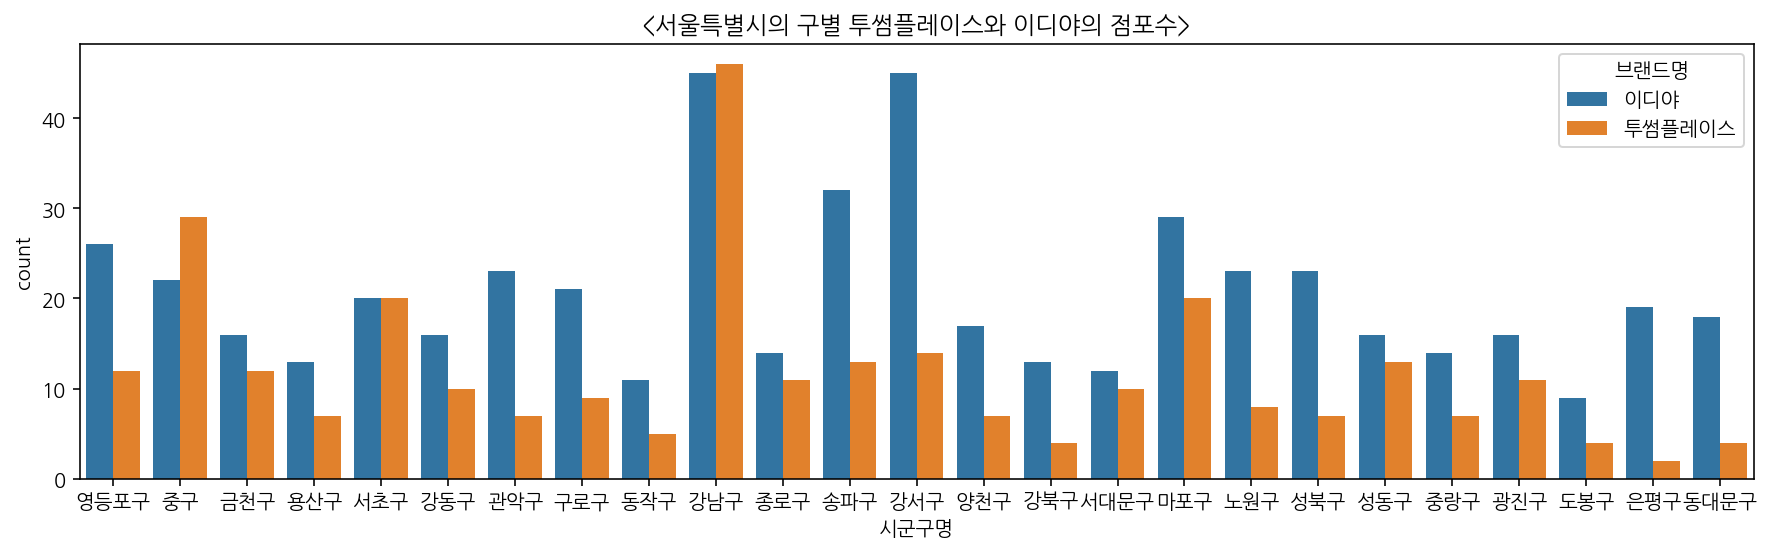

In [28]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")
plt.title('<{}의 구별 {}와 {}의 점포수>'.format(city,cafe_1[0],cafe_2[0]))

## 위도, 경도로 scatterplot 그리기

Text(0.5, 1.0, '<서울특별시의 구별 투썸플레이스와 이디야의 점포수>')

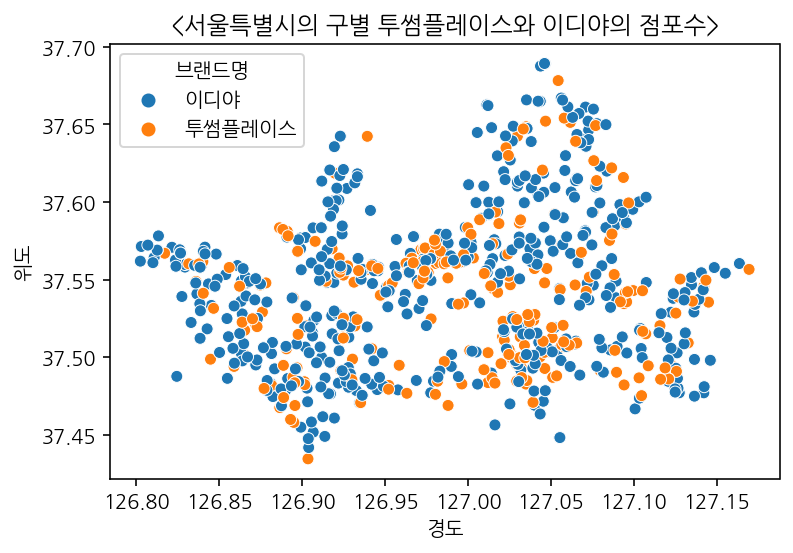

In [29]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")
plt.title('<{}의 구별 {}와 {}의 점포수>'.format(city,cafe_1[0],cafe_2[0]))

Text(0.5, 1.0, '<서울특별시의 구별 투썸플레이스>')

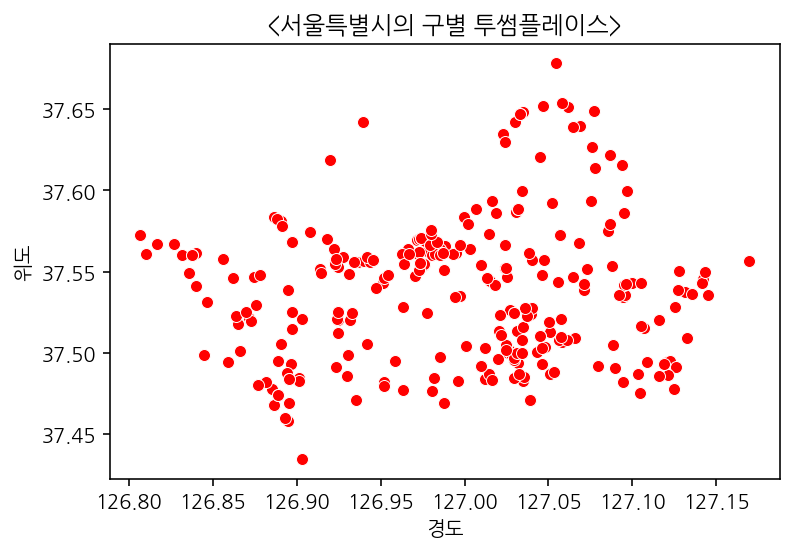

In [30]:
sns.scatterplot(data=df_cafe[df_cafe['브랜드명']==cafe_1[0]], x="경도", y="위도",color=cafe_1[2])
plt.title('<{}의 구별 {}>'.format(city,cafe_1[0]))

Text(0.5, 1.0, '<서울특별시의 구별 이디야>')

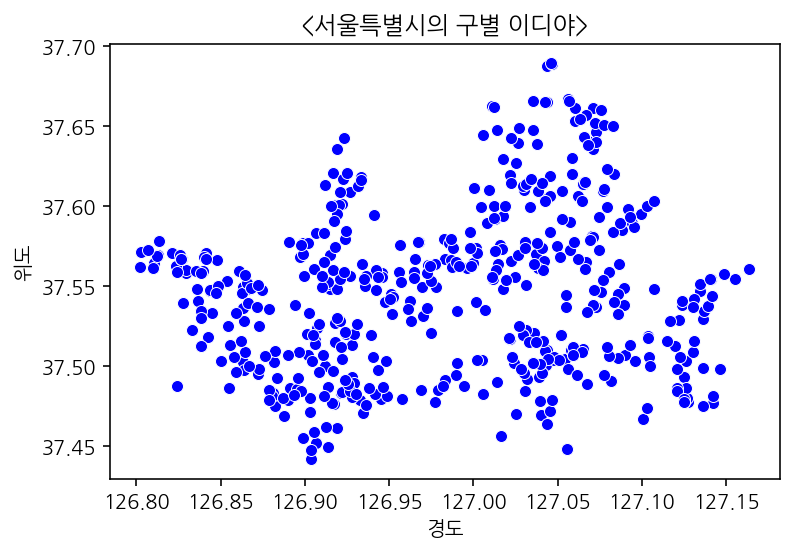

In [31]:
sns.scatterplot(data=df_cafe[df_cafe['브랜드명']==cafe_2[0]], x="경도", y="위도",color=cafe_2[2])
plt.title('<{}의 구별 {}>'.format(city,cafe_2[0]))

## 브랜드별 구별 점포 수

In [32]:
# groupby 를 사용해 구별로 그룹화
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용합니다.
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["경도"].count()
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,이디야,45
1,강남구,투썸플레이스,46
2,강동구,이디야,16
3,강동구,투썸플레이스,10
4,강북구,이디야,13


Text(0.5, 1.0, '<서울특별시의 시군구별 투썸플레이스와 이디야의 점포수>')

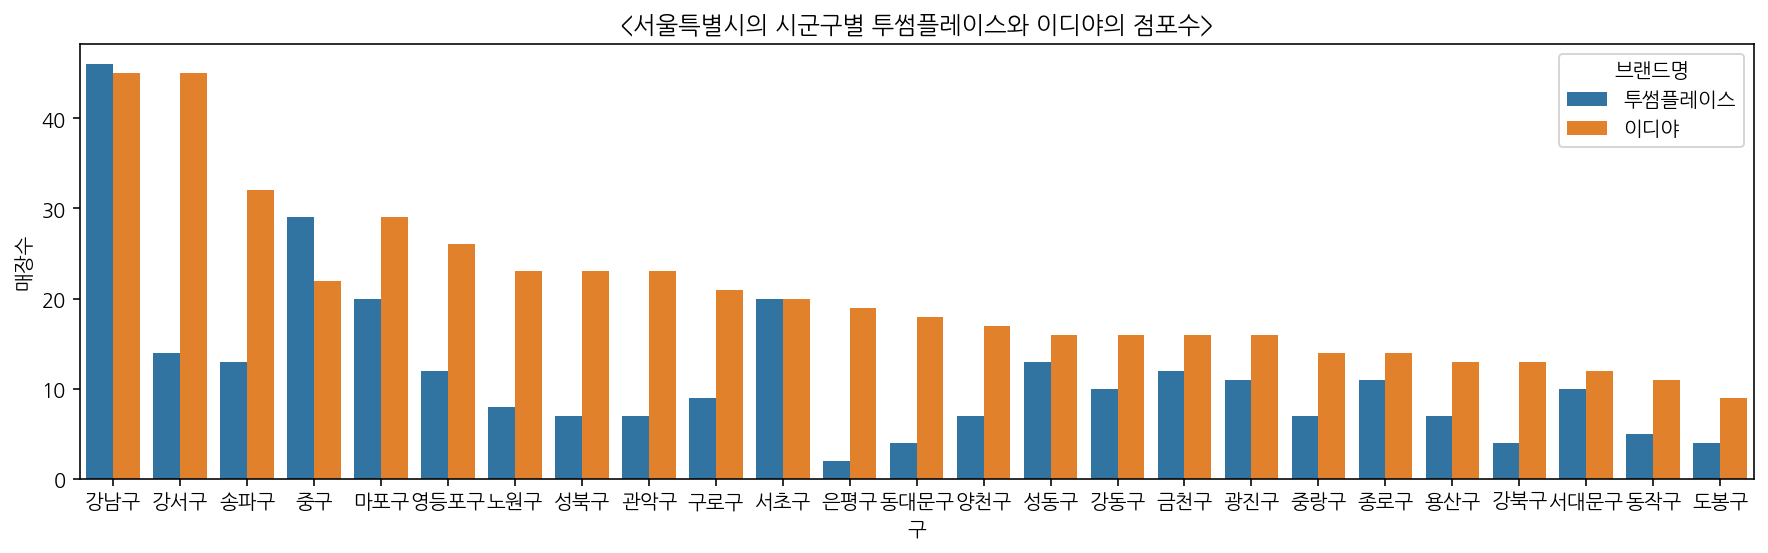

In [33]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs.sort_values("매장수", ascending=False), x="구", y="매장수", hue="브랜드명")
plt.title('<{}의 시군구별 {}와 {}의 점포수>'.format(city,cafe_1[0],cafe_2[0]))

Text(0.5, 1.0, '<서울특별시의 시군구별 투썸플레이스 점포수>')

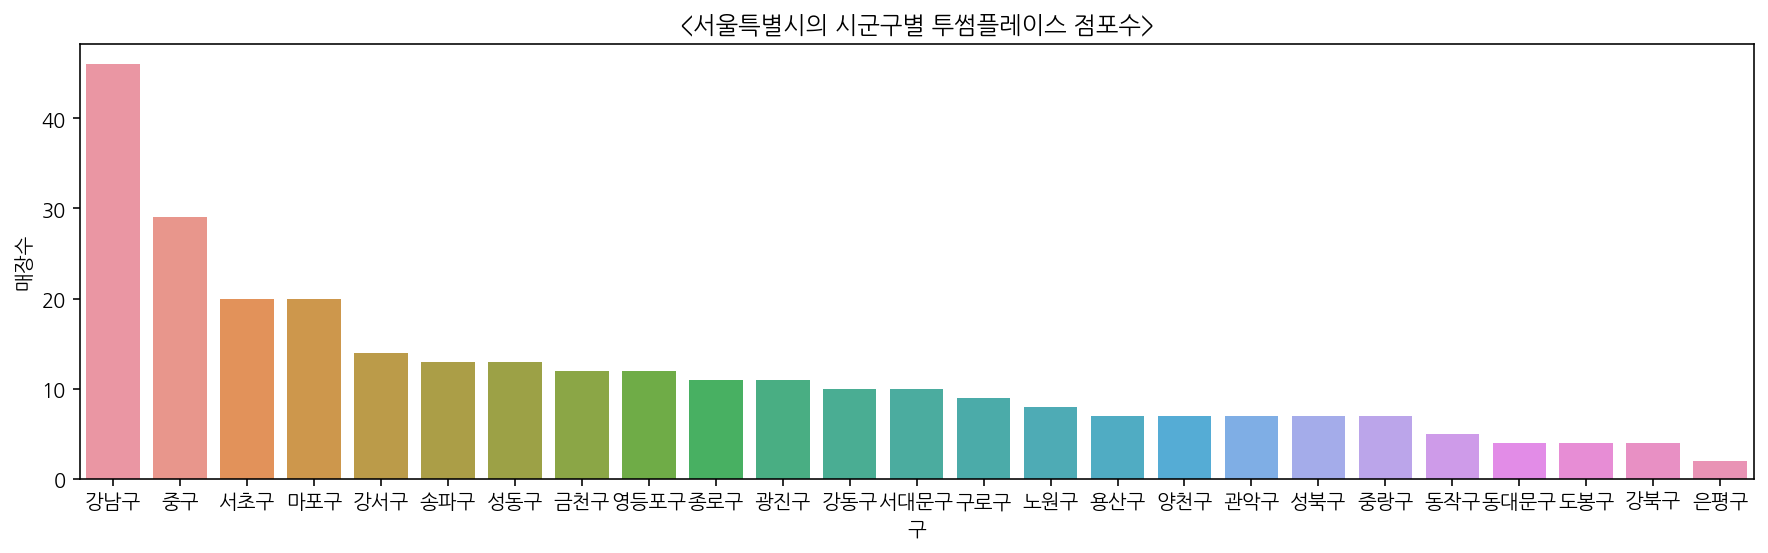

In [34]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs[df_cafe_vs['브랜드명']==cafe_1[0]].sort_values("매장수", ascending=False), x="구", y="매장수")#, hue="브랜드명")
plt.title('<{}의 시군구별 {} 점포수>'.format(city,cafe_1[0]))

Text(0.5, 1.0, '<서울특별시의 시군구별 이디야 점포수>')

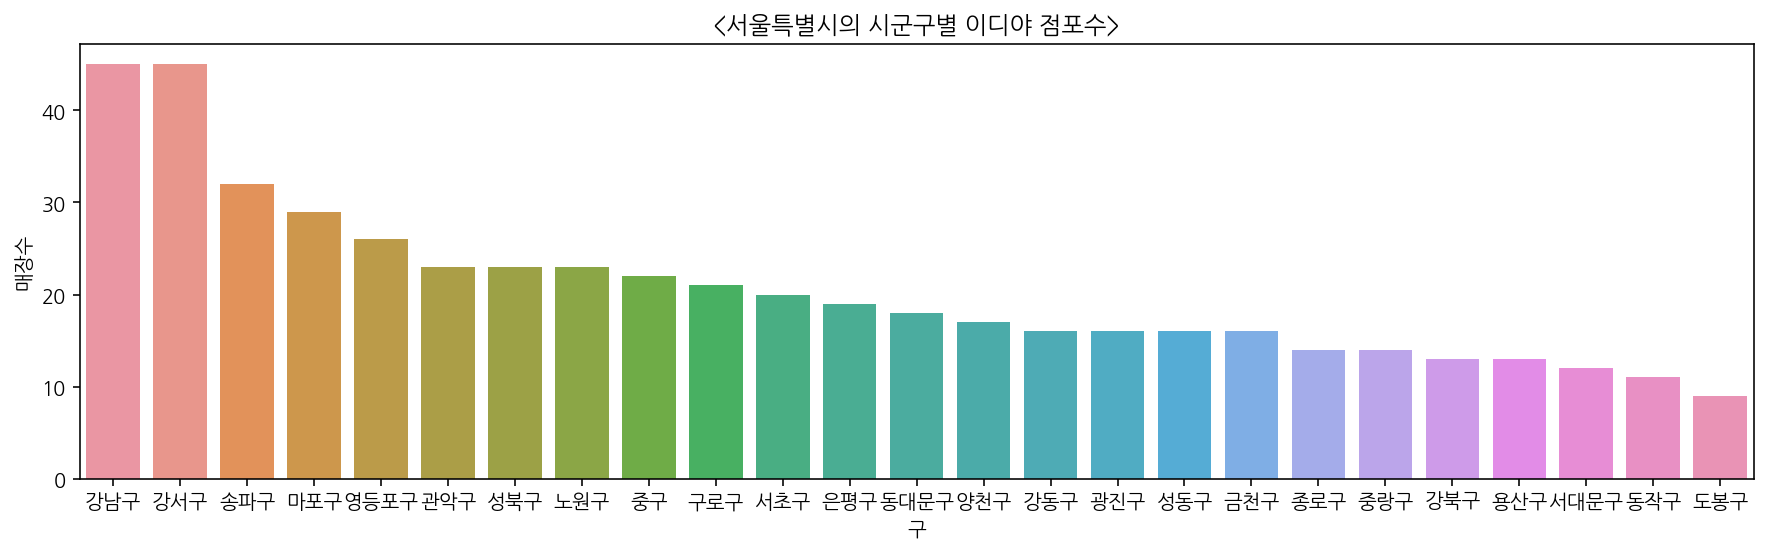

In [35]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs[df_cafe_vs['브랜드명']==cafe_2[0]].sort_values("매장수", ascending=False), x="구", y="매장수")#, hue="브랜드명")
plt.title('<{}의 시군구별 {} 점포수>'.format(city,cafe_2[0]))

In [36]:
lat=df_cafe["위도"].mean()
long=df_cafe["경도"].mean()
lat, long

(37.54301548497096, 126.98734227443553)

In [37]:
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = f"{df_cafe.loc[i, '브랜드명']} - {df_cafe.loc[i, '도로명주소']}"
    color = cafe_1[2]
    if df_cafe.loc[i, "브랜드명"] == cafe_2[0]:
        color = cafe_2[2]
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)
m

In [38]:
geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding="utf-8"))

In [39]:
df_1 = df_cafe_vs[df_cafe_vs["브랜드명"] == cafe_1[0]]
df_2 = df_cafe_vs[df_cafe_vs["브랜드명"] == cafe_2[0]]

In [40]:
m = folium.Map([lat, long],tiles='cartodbpositron')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_1,
    columns=['구', '매장수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color=cafe_1[-1],
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='{} 매장수'.format(cafe_1[0])
).add_to(m)
m

In [41]:
m = folium.Map([lat, long],tiles='cartodbpositron')
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2,
    columns=['구', '매장수'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color=cafe_2[-1],
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='{} 매장수'.format(cafe_2[0])
).add_to(m)
m